Aktivitas Penjelasan                          Sebelumnya      ES    EF    LS    LF    Slack Critical
   A     Create Project Plan                  none            0     7     0     7       0     YES   
   B     System Design Planning               A               7     10    7     10      0     YES   
   C     Wireframing                          B               10    18    10    18      0     YES   
   D     App Development                      C               18    31    18    31      0     YES   
   E     Connect Back-End with Front-End      D, M            31    35    31    35      0     YES   
   F     Application Testing                  E               35    39    35    39      0     YES   
   G     Data Collection & Cleaning           A               7     14    16    23      9      NO   
   H     ML Technology Research               G               14    19    23    28      9      NO   
   I     Architecting ML Model                H               19    24    28    33      9  

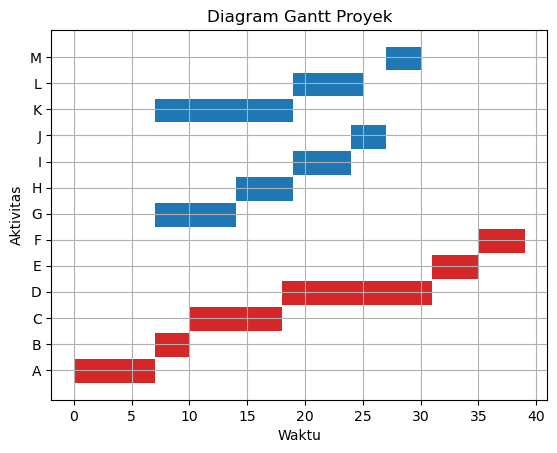

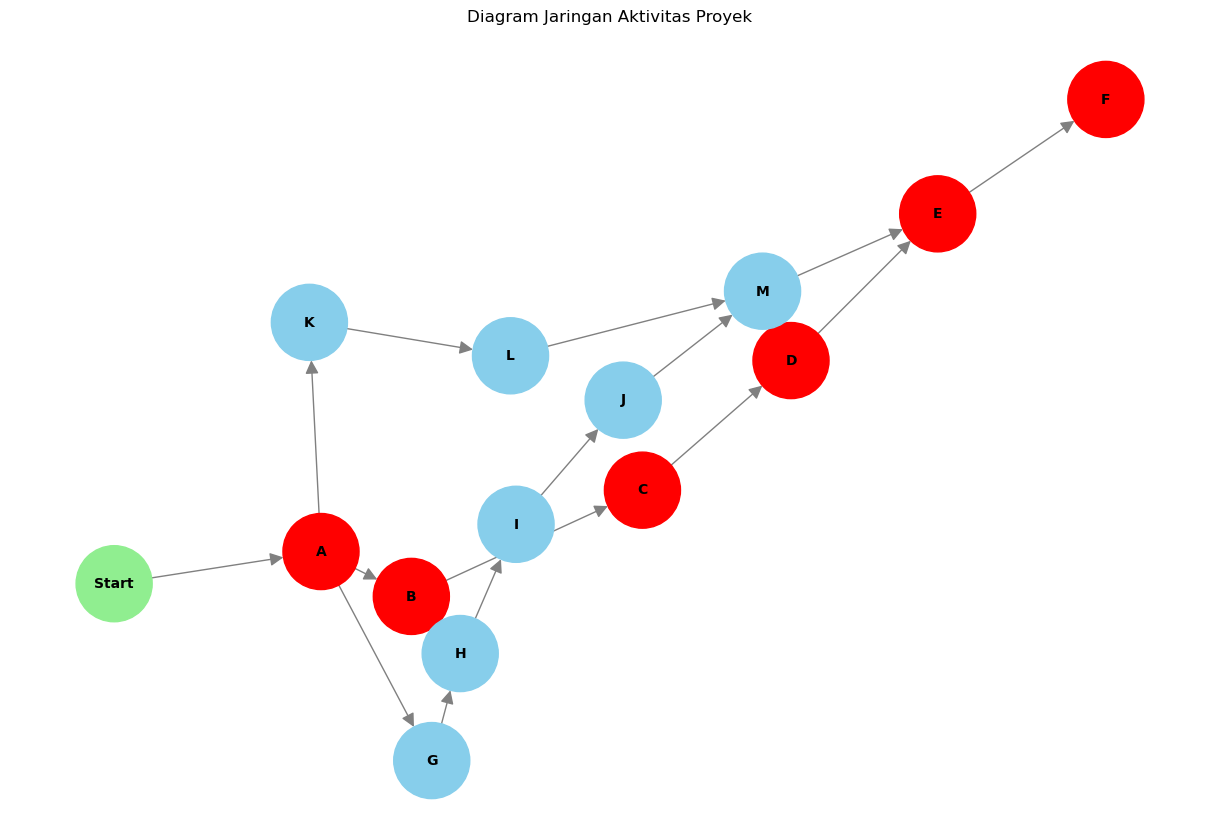

In [2]:
# - Rasyid Andriansyah (2101963)

import matplotlib.pyplot as plt
import networkx as nx

class Aktivitas:
    def __init__(self, nama, penjelasan, durasi, pendahulu):
        self.nama = nama
        self.penjelasan = penjelasan
        self.durasi = durasi
        self.pendahulu = pendahulu
        self.mulai_terawal = 0
        self.selesai_terawal = 0
        self.mulai_terakhir = float('inf')
        self.selesai_terakhir = float('inf')
        self.slack = 0

def forward_pass(aktivitas):
    for akt in aktivitas.values():
        if not akt.pendahulu:
            akt.selesai_terawal = akt.durasi
        else:
            akt.mulai_terawal = max(aktivitas[pend].selesai_terawal for pend in akt.pendahulu)
            akt.selesai_terawal = akt.mulai_terawal + akt.durasi

def backward_pass(aktivitas, waktu_akhir):
    for akt in reversed(list(aktivitas.values())):
        if akt.selesai_terakhir == float('inf'):
            akt.selesai_terakhir = waktu_akhir
        akt.mulai_terakhir = akt.selesai_terakhir - akt.durasi
        for pend in akt.pendahulu:
            aktivitas[pend].selesai_terakhir = min(aktivitas[pend].selesai_terakhir, akt.mulai_terakhir)
            aktivitas[pend].mulai_terakhir = aktivitas[pend].selesai_terakhir - aktivitas[pend].durasi

def hitung_slack(aktivitas):
    for akt in aktivitas.values():
        akt.slack = akt.mulai_terakhir - akt.mulai_terawal

def find_critical_path(aktivitas):
    return [akt.nama for akt in aktivitas.values() if akt.slack == 0 and akt.mulai_terawal == akt.mulai_terakhir and akt.selesai_terawal == akt.selesai_terakhir]

def plot_gantt(aktivitas):
    fig, gnt = plt.subplots()

    gnt.set_xlabel('Waktu')
    gnt.set_ylabel('Aktivitas')

    gnt.set_yticks(range(10, 10 * len(aktivitas) + 1, 10))
    gnt.set_yticklabels([akt.nama for akt in aktivitas.values()])

    for i, akt in enumerate(aktivitas.values()):
        gnt.broken_barh([(akt.mulai_terawal, akt.durasi)], (10 * i + 5, 9), facecolors=('tab:blue' if akt.slack > 0 else 'tab:red'))

    plt.title("Diagram Gantt Proyek")
    plt.grid(True)
    plt.show()

def plot_network(aktivitas, jalur_kritis):
    G = nx.DiGraph()

    # Tambahkan node Start
    G.add_node("Start", label="Start")
    for akt in aktivitas.values():
        G.add_node(akt.nama, label=akt.nama)
        if not akt.pendahulu:
            G.add_edge("Start", akt.nama)
        for pend in akt.pendahulu:
            G.add_edge(pend, akt.nama)

    pos = nx.spring_layout(G)  # posisi node dalam layout melingkar
    plt.figure(figsize=(12, 8))
    node_colors = ['lightgreen' if node == "Start" else 'red' if node in jalur_kritis else 'skyblue' for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=3000, font_size=10, font_color='black', font_weight='bold', edge_color='gray', arrowsize=20)
    plt.title("Diagram Jaringan Aktivitas Proyek")
    plt.show()

def main():
    # Definisikan aktivitas-aktivitas
    aktivitas = {
        'A': Aktivitas('A', 'Create Project Plan', 7, []),
        'B': Aktivitas('B', 'System Design Planning' ,3, ['A']),
        'C': Aktivitas('C', 'Wireframing' ,8, ['B']),
        'D': Aktivitas('D', 'App Development' ,13, ['C']),
        'E': Aktivitas('E', 'Connect Back-End with Front-End ' ,4, ['D', 'M']),
        'F': Aktivitas('F', 'Application Testing' ,4, ['E']),
        'G': Aktivitas('G', 'Data Collection & Cleaning' ,7, ['A']),
        'H': Aktivitas('H', 'ML Technology Research' ,5, ['G']),
        'I': Aktivitas('I', 'Architecting ML Model' ,5, ['H']),
        'J': Aktivitas('J', 'ML Model Testing & Evaluation' ,3, ['I']),
        'K': Aktivitas('K', 'Create Back-End/API' ,12, ['A']),
        'L': Aktivitas('L', 'Deployment & Storing Data' ,6, ['K']),
        'M': Aktivitas('M', 'Model Integration' ,3, ['L', 'J']),   
    }

    # Lakukan lintasan maju
    forward_pass(aktivitas)

    # Temukan waktu akhir proyek
    waktu_akhir = max(akt.selesai_terawal for akt in aktivitas.values())

    # Lakukan lintasan mundur
    backward_pass(aktivitas, waktu_akhir)

    # Hitung slack untuk setiap aktivitas
    hitung_slack(aktivitas)

    # Temukan jalur kritis
    jalur_kritis = find_critical_path(aktivitas)

    # Cetak hasilnya
    header = "{:<8} {:<35} {:<15} {:<5} {:<5} {:<5} {:<5} {:<5} {:<8}".format(
        "Aktivitas", "Penjelasan", "Sebelumnya", "ES", "EF", "LS", "LF", "Slack", "Critical"
    )
    print(header)
    print("=" * len(header))
    for akt in aktivitas.values():
        pendahulu = ", ".join(akt.pendahulu) if akt.pendahulu else "none"
        kritis = "YES" if akt.slack == 0 and akt.mulai_terawal == akt.mulai_terakhir and akt.selesai_terawal == akt.selesai_terakhir else "NO"
        print("{:^8} {:<36} {:<15} {:<5} {:<5} {:<5} {:<5} {:^5} {:^8}".format(
            akt.nama, akt.penjelasan, pendahulu, akt.mulai_terawal,
            akt.selesai_terawal, akt.mulai_terakhir, akt.selesai_terakhir, akt.slack, kritis
        ))

    print("\nJalur Kritis:", " -> ".join(jalur_kritis))

    # Plot Gantt chart
    plot_gantt(aktivitas)

    # Plot Network diagram
    plot_network(aktivitas, jalur_kritis)

if __name__ == "__main__":
    main()
